# AE4465 (MM&A) - Lecture 1 (Pearson correlation)

Assume you are working for airlineX. They provide you with data of their maintenance costs (regarding total operational cost) and flight hours per aircraft type. The first task they ask you is to correlate these two indicators.

## Importing libraries and the data
The first thing you need to do is unpack the data from the .csv file to a pandas dataframe structure. You can also open the file in Excel directly to check its contents.

 &nbsp;
<center><img top-margin="10px" alt="Excel data" src="imgs\excel_data.png" width="700"/></center>


In [4]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Import the data in csv file
aircraft_dt = pd.read_csv('les01_data.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(aircraft_dt.columns, range(len(aircraft_dt.columns))):
    print(i, '- Column: ', colname)

The columns of the csv file are: 
0 - Column:  Aircraft Type
1 - Column:  Maintenance Cost (% of Operational Cost)
2 - Column:  Flight hours (per aircraft type)


## Plotting the data with a scatter plot
It is important to see how the data is correlated using a visualization tool. In this case, we will use the scatter plot. We will use the matplotlib package through the alias plt.

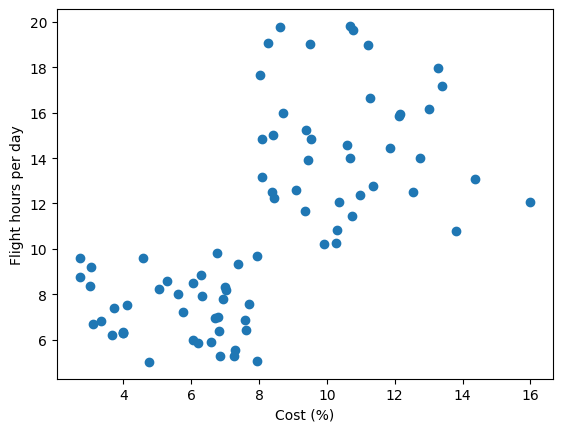

In [9]:
# read the data into two arrays
cost = aircraft_dt['Maintenance Cost (% of Operational Cost)']
flight_hours = aircraft_dt['Flight hours (per aircraft type)']
# Plot the two indicators against each other
plt.scatter(cost, flight_hours)
plt.ylabel('Flight hours per day')
plt.xlabel('Maintenance cost (%)')
plt.show()

## Visual relationship
It seems there is a weak relationship between the two data columns as you can see in the chart above. Higher costs (>8) seem to be related to higher flight hours (> 10 hours per day).

## Correlating the two indicators
To correlate the two indicators you need to get the data from the pandas dataframe and use a correlation measure. We use the Pearson correlation in this example.

In statistics, the Pearson correlation coefficient, also known as Pearson's r, is a measure of the linear correlation between two variables (two columns of data). It is the ratio between the covariance of two variables and the product of their standard deviations. The result is always a value between −1 and 1.

$$ \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}} $$

where:
$ \operatorname{cov} $  is the covariance
$ \sigma_{X} $  is the standard deviation of $X$
$ \sigma_{Y} $  is the standard deviation of $Y$


## Using the numpy correlation function

Let's use our values and compute the correlation matrix using a numpy function.

In [11]:
my_rho = np.corrcoef(cost, flight_hours)

print(my_rho)

[[1.         0.65971743]
 [0.65971743 1.        ]]


## Output of pearson correlation
The above is the output correlation matrix. Note the ones on the diagonals, indicating that the correlation coefficient of a variable with itself is one. The $\rho$ is a positive 0.66, a slight linear correlation. Note that the Pearson correlation only detects linear relationships.

## Conclusion
As a final example, note what would be a perfect correlation compared to ours.

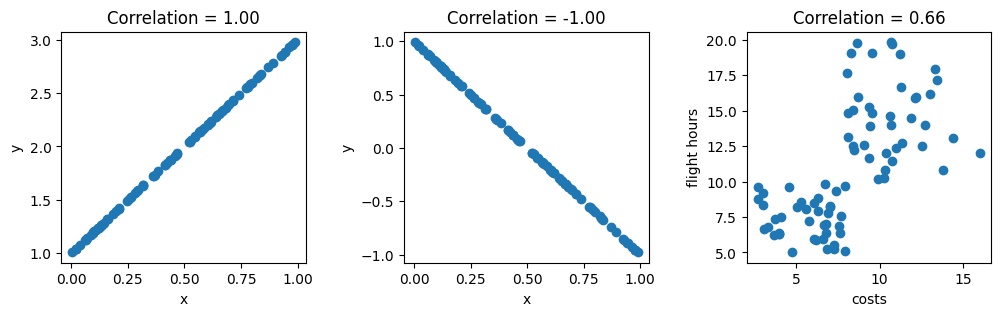

In [36]:
rand = np.random.RandomState(0)

i = rand.uniform(0,1,100)
y_1 = i*2+1 # linear relationship
y_2 = -i*2+1 # linear inverse relationship
rho_1 = np.corrcoef(i, y_1)
rho_2 = np.corrcoef(i, y_2)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
# Plot of perfect correlation (rho = 1)
ax[0].scatter(i, y_1)
ax[0].title.set_text('Correlation = ' + "{:.2f}".format(rho_1[0,1]))
ax[0].set(xlabel='x',ylabel='y')
# Plot of perfect correlation (rho = -1)
ax[1].scatter(i, y_2)
ax[1].title.set_text('Correlation = ' + "{:.2f}".format(rho_2[0,1]))
ax[1].set(xlabel='x',ylabel='y')
# Plot of our correlation (rho = 0.66)
ax[2].scatter(cost, flight_hours)
ax[2].title.set_text('Correlation = ' + "{:.2f}".format(my_rho[0,1]))
ax[2].set(xlabel='costs',ylabel='flight hours')

fig.subplots_adjust(wspace=.4)
plt.show()